In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# ÂÆö‰πâÂõ†Â≠êÔºÅ

In [6]:
@staticmethod
def factor(df, period=14):
    '''ËµÑÈáëÊµÅÈáèÊåáÊï∞ÔºöÁªìÂêà‰ª∑Ê†ºÂíåÊàê‰∫§ÈáèÁöÑRSIÂèò‰Ωì'''
    # ËÆ°ÁÆóÂÖ∏Âûã‰ª∑Ê†º
    typical_price = (df['high'] + df['low'] + df['close']) / 3
    
    # ËÆ°ÁÆóÂéüÂßãËµÑÈáëÊµÅ
    raw_money_flow = typical_price * df['volume']
    
    # ËÆ°ÁÆóÊ≠£ÂêëÂíåË¥üÂêëËµÑÈáëÊµÅ
    money_flow_direction = np.where(typical_price > typical_price.shift(1), 1, -1)
    positive_flow = raw_money_flow.where(money_flow_direction > 0, 0)
    negative_flow = raw_money_flow.where(money_flow_direction < 0, 0)
    
    # ËÆ°ÁÆóËµÑÈáëÊØîÁéá
    money_ratio = positive_flow.rolling(period).sum() / negative_flow.rolling(period).sum()
    money_ratio = money_ratio.replace([np.inf, -np.inf], np.nan).fillna(1)
    
    # ËÆ°ÁÆóMFI
    mfi = 100 - (100 / (1 + money_ratio))
    return mfi

# ÊµãËØïÂõ†Â≠êË°®Áé∞


üìä ÂçïÂ∏ÅÁßç (single) ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:
--------------------------------------------------
üîó Áõ∏ÂÖ≥ÊÄßÂàÜÊûê:
   IC (Pearson): 0.005430
   Rank_IC (Spearman): -0.035771
üìä ‰ø°ÊÅØÊØîÁéá:
   IR: 0.245516
   ÊúâÊïàÂàÜÁªÑÊï∞: 10
üìä Âõ†Â≠êÂàÜÂ∏É:
üìã Êï∞ÊçÆÊ¶ÇÂÜµ:
   Êï∞ÊçÆÈïøÂ∫¶: 131035
   Âõ†Â≠êÂàó: factor
   Êî∂ÁõäÁéáÂàó: future_return
   Êú™Êù•Êî∂ÁõäÂë®Êúü: 10
--------------------------------------------------

üñºÔ∏è  ÂçïÂ∏ÅÁßç (single) ÂõæÁâáÂ±ïÁ§∫:
----------------------------------------
üìä ÊòæÁ§∫ÂàÜÁªÑÂàÜÊûêÂõæ...


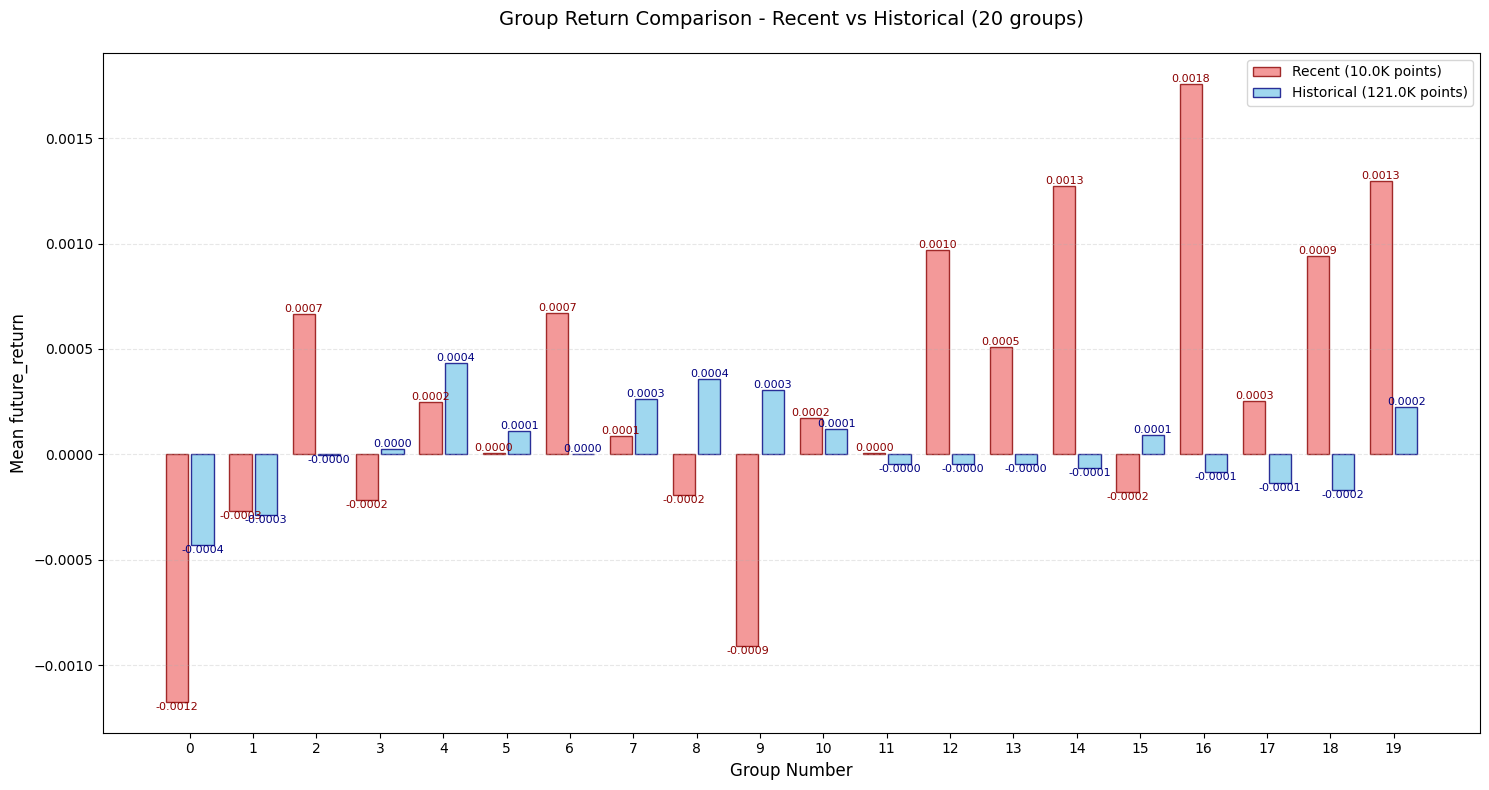

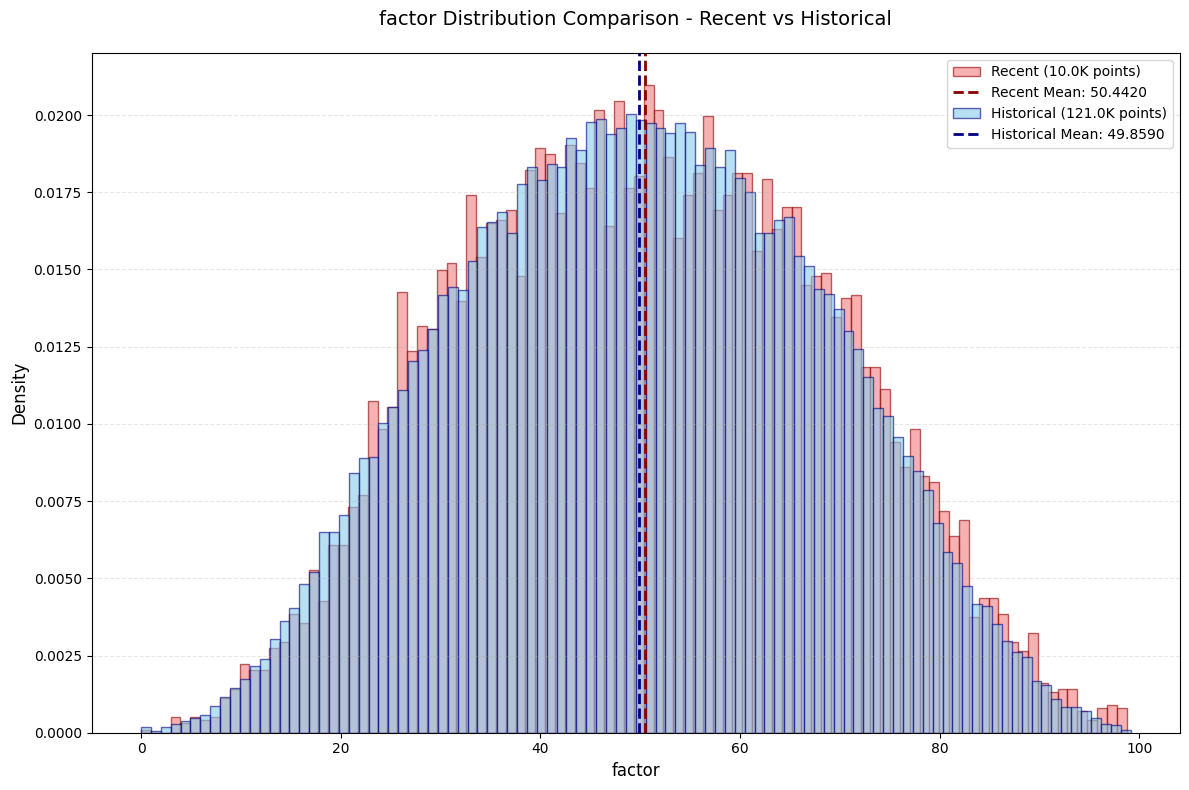

üìà ÊòæÁ§∫Âõ†Â≠êÂàÜÂ∏ÉÂõæ...
‚úÖ Â∑≤ÊòæÁ§∫ 2 ‰∏™ÂõæÁâá
----------------------------------------


In [7]:
evaluator.set_factor(
    factor_func=factor,
    factor_name='factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

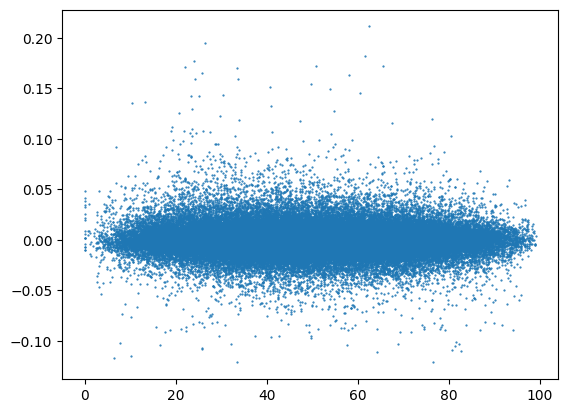

In [8]:
import matplotlib.pyplot as plt
plt.scatter(factor(df),df['close'].pct_change(-10), s=0.3)

In [9]:
result['information_ratio']['group_correlations']
# ËøôË°®Á§∫‰∏çÂêåÂàÜÁªÑ‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÔºåÈÄöÂ∏∏Áî®‰∫éËØÑ‰º∞Âõ†Â≠êÂú®‰∏çÂêåÂ∏ÇÂú∫Áä∂ÊÄÅ‰∏ãÁöÑË°®Áé∞‰∏ÄËá¥ÊÄß„ÄÇ
# Â¶ÇÊûúÁõ∏ÂÖ≥ÊÄßËæÉÈ´òÔºåËØ¥ÊòéÂõ†Â≠êÂú®‰∏çÂêåÂ∏ÇÂú∫Áä∂ÊÄÅ‰∏ãË°®Áé∞‰∏ÄËá¥ÔºõÂ¶ÇÊûúÁõ∏ÂÖ≥ÊÄßËæÉ‰ΩéÔºåËØ¥ÊòéÂõ†Â≠êÂú®‰∏çÂêåÂ∏ÇÂú∫Áä∂ÊÄÅ‰∏ãË°®Áé∞Â∑ÆÂºÇËæÉÂ§ß„ÄÇ

[0.006990722785416112,
 0.0056109487915234554,
 -0.008817593569729455,
 0.0026338574162381063,
 0.00022185568666784687,
 -0.015060478911332035,
 0.002345546526092587,
 0.004882633185460693,
 0.0035853193311103635,
 0.018732853529489772]

In [10]:
print(result)

{'correlation_analysis': {'IC': 0.005430366592166509, 'Rank_IC': -0.03577111770914994}, 'information_ratio': {'IR': 0.24551551349804568, 'group_correlations': [0.006990722785416112, 0.0056109487915234554, -0.008817593569729455, 0.0026338574162381063, 0.00022185568666784687, -0.015060478911332035, 0.002345546526092587, 0.004882633185460693, 0.0035853193311103635, 0.018732853529489772], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.0000  20.5780   15.4768      -0.0005      0.0136   6552
1      20.5787  25.9421   23.4198      -0.0003      0.0137   6552
2      25.9429  29.9807   28.0280       0.0001      0.0127   6552
3      29.9822  33.4139   31.7150       0.0000      0.0121   6551
4      33.4140  36.4434   34.9503       0.0004      0.0118   6552
5      36.4434  39.3624   37.9356       0.0001      0.0111   6552
6      39.3631  42.0840   40.7270